In [6]:
# Imports
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




loc = '/home/sh16450/code/'
# drifting snow mass flux (3D)
# default is g/kg, therefore divide by 1000
LQS = xr.open_dataset(loc + 'daily-LQS-MAR_ERA5-2007-2016.nc')['LQS']/1000
# cloud optical depth (COD)
COD = xr.open_dataset(loc + 'daily-COD-MAR_ERA5-2007-2016.nc')



# Create the filter thresholds for clear-sky days based on cloud optical depth
filter_COD = 0.7
# Create the filter threshold for blowing snow conditions
# 10^(-7) kg/kg*day is based on Gerber et al. (2023), Sec 2.1
filter_qs = 10**(-5)



# sum adds +1 for every instance where clear-sky detected
# divided by the total length of the time axis gives frequency of clear skies
frequency_clear = (COD['COD'] < filter_COD).sum(dim='TIME') / np.shape(COD['COD'])[0]
time_clear = (COD['COD'] < filter_COD)

# Where is blowing snow detected?
blowing_snow = LQS.where(LQS >= filter_qs)
# Vertical sum of daily detected blowing snow instances
bs_vert_total = (LQS > filter_qs).sum(dim='ATMLAY') # total sum of vertical detections of BS



In [9]:
# LQS but cloudy days removed
LQS_no_clouds = LQS.where(time_clear == True) 
# This yields 0 when false and 1 when BS is above threshold
LQS_bs_clear = (LQS_no_clouds > filter_qs) # LQS above detectable blowing snow threshold
# This keeps the actual LQS values when clear and BS detected
LQS_clear_and_bs = LQS.where((time_clear == True)&(LQS > filter_qs)) 
# sum of vertical layers that detected blowing snow
total_vert_bs = LQS_bs_clear.sum(dim='ATMLAY')

# True or false if at least one layer on a given day had blowing snow
vert_snow_detected = total_vert_bs > 0

# Sum per month of cloud-free BS occurences (DO NOT USE)
LQS_bs_clear_sum = LQS_bs_clear.resample(TIME='MS').sum()
# This version detects blowing snow if at least one ATMLAY has detected BS (USE THIS)
LQS_bs_clear_sum_alt = vert_snow_detected.resample(TIME='MS').sum()
# Create the actual frequencies
days_in_month = LQS_bs_clear_sum_alt.TIME.dt.daysinmonth # AMAZING :-D Gives days in each month for the frequency analysis
frequency_monthly_bs = LQS_bs_clear_sum_alt/days_in_month
frequency_monthly_bs


<xarray.DataArray (TIME: 120, Y: 148, X: 176)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.03225806, ..., 0.06451613,
         0.03225806, 0.        ],
        [0.        , 0.        , 0.03225806, ..., 0.03225806,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.03571429, 0.        ],
...
        [0.        , 0.06666667, 0.06666667, ..., 0.26666667,
         0.1       , 0.        ],
        [0.        , 0.03333333, 0.1       , ..., 0.13333333,
         0.03333333, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.03225806,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.03225806, ..., 0.06451613,
         0.06451613, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.06451613,
         0.03225806, 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]])
Coordinates:
  * X        (X) float32 -3.01e+03 -2.975e+03 -2.94e+03 ... 3.08e+03 3.115e+03
  * Y        (Y) float32 -2.555e+03 -2.52e+03 -2.485e+03 ... 2.555e+03 2.59e+03
  * TIME     (TIME) datetime64[ns] 2007-01-01 2007-02-01 ... 2016-12-01

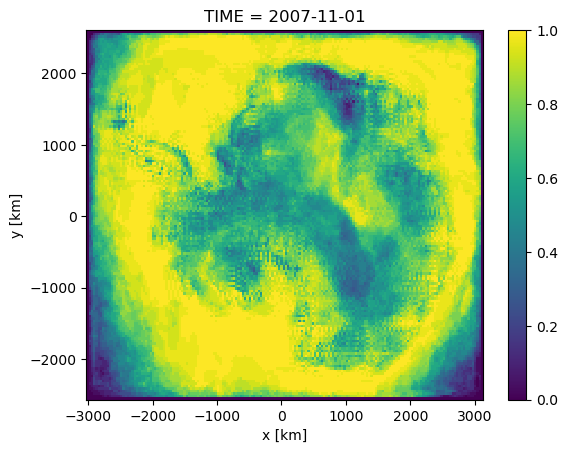

In [8]:
plt.close('all')
frequency_monthly_bs.isel(TIME=10).plot()



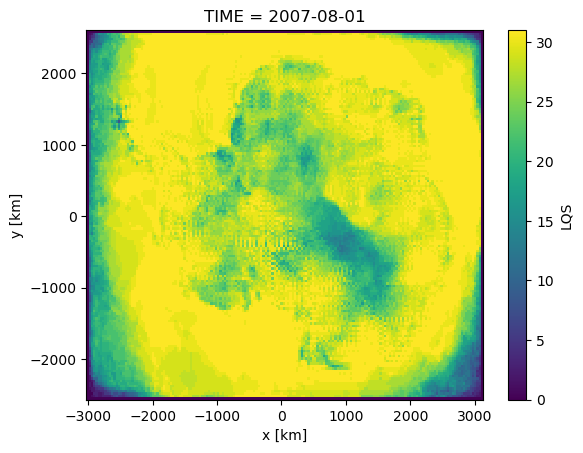

In [6]:
LQS_bs_clear_sum_alt[7,:,:].plot()

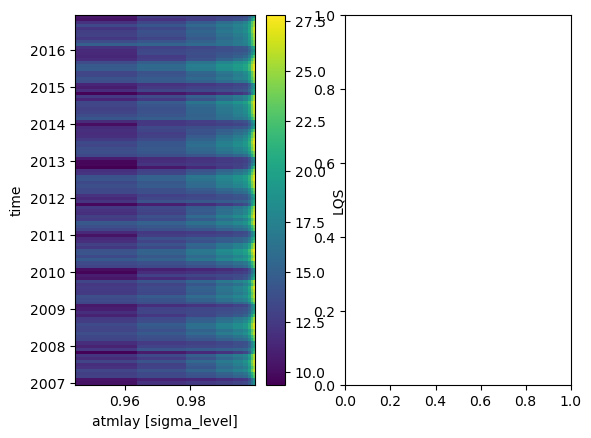

In [7]:
fig,axs = plt.subplots(nrows=1, ncols=2)
LQS_bs_clear_sum.mean(dim=['Y', 'X']).plot(ax=axs[0])
